# Descricao do Projeto

Arquivo criado para explicar a diferenca e como calcular algumas das maneira mais comuns de conhecermos nossos dados, como Media Aritmetica, Media Aritmetica Ponderada, Moda, Mediana entre outras... 

Veremos primeiramente dados nao_agrupados e depois dados agrupados

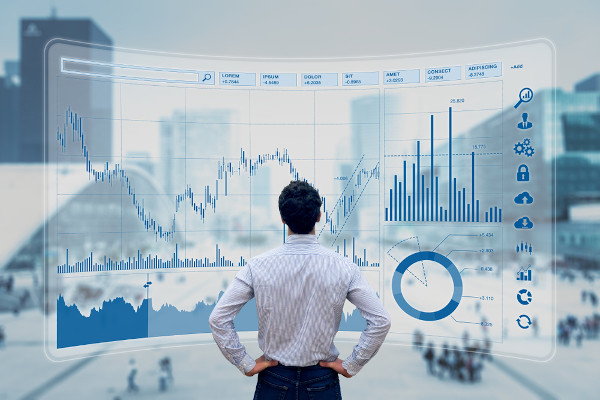

#### Vamos comecar o estudo pela:

## Media Aritmetica

A media e calculada pela soma de todos os dados e dividida pela quantidade de dados.
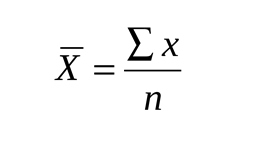
Onde x sao os dados e n a quantidade de dados
### Vamos ver na pratica.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import math

In [2]:
# Criando lista de dados
dados_media = np.array([1,2,4,4.4,4.4,5,5.6,7,7,7,7,7,8,9.8,10.1,12,15])

# Calculando a media
        #     Soma        /   Quantidade
media = dados_media.sum() / len(dados_media)
print('A media pelo metodo de criacao da formula foi de: ',media)

# Tambem e possivel usar uma funcao ja pronta
media_2 = dados_media.mean()
print('A media calculada por uma funcao ja pronta foi de: ',media)

A media pelo metodo de criacao da formula foi de:  6.841176470588236
A media calculada por uma funcao ja pronta foi de:  6.841176470588236


## Moda

A moda se e obtida observando o valor que mais se repete no dataset, neste caso: 7

Porem ja existem funcoes prontas para verificar isto entre elas:

In [3]:
print('Com a biblioteca statistics, encontramos com a funcao mode() o valor da moda,\n  neste caso:')
statistics.mode(dados_media)

Com a biblioteca statistics, encontramos com a funcao mode() o valor da moda,
  neste caso:


7.0

In [4]:
print('Com a biblioteca scipy(stats), encontramos com a funcao mode() \n   o valor da moda e a quantidade de vezes que o dado se repete,\n    neste caso:')
stats.mode(dados_media)

Com a biblioteca scipy(stats), encontramos com a funcao mode() 
   o valor da moda e a quantidade de vezes que o dado se repete,
    neste caso:


ModeResult(mode=array([7.]), count=array([5]))

## Mediana

A mediana, como o nome ja sujere e(sao) o(s) dado(s) que se encontra(m) no meio do dataset,
podendo se dividir em mediana impar, quando a quantidade de dado no dataset e impar,
e mediana par, quando a quantidade de dado no dataset e par.

Temos as formulas: 
### Localizacao da Mediana impar
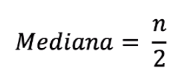
(com esta formula se encontra a posicao da mediana)

### Localizacao da Mediana par
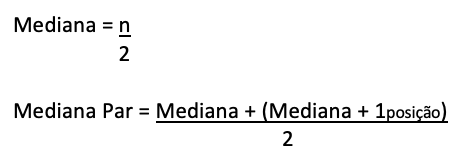
(com a primeira formula voce encontrara as posicoes a serem inseridas na segunda formula,
a qual neste se encontra o valor da mediana)

In [5]:
# Localizar a posicao
posicao_impar = math.ceil(len(dados_media) / 2)
print('O dado que desejamos se encontra na posicao: ',posicao_impar)
print('O valor da mediana e de: ',dados_media[posicao_impar - 1])

O dado que desejamos se encontra na posicao:  9
O valor da mediana e de:  7.0


In [6]:
# Criando dados mediana par
dados_med_par = np.array([1,2,3,4])

# Localizar posicao
posicao_par = len(dados_med_par) // 2
print('O dado que desejamos se encontra na posicao: ',posicao_par)
print('O valor da mediana e de: ',((dados_med_par[posicao_par - 1] + dados_med_par[posicao_par]) / 2))

O dado que desejamos se encontra na posicao:  2
O valor da mediana e de:  2.5


In [7]:
# Utilizando das bibliotecas
print('O valor da mediana impar pelo Numpy e de: ',np.median(dados_media))
print('O valor da mediana par pelo Numpy e de: ',np.median(dados_med_par))

# OU

print('\nO valor da mediana impar pelo Statistics e de: ',statistics.median(dados_media))
print('O valor da mediana par pelo Statistics e de: ',statistics.median(dados_med_par))

O valor da mediana impar pelo Numpy e de:  7.0
O valor da mediana par pelo Numpy e de:  2.5

O valor da mediana impar pelo Statistics e de:  7.0
O valor da mediana par pelo Statistics e de:  2.5


## Media Aritmetica Ponderada

Esta por sua vez e muito semelhante a Media Aritmetica tradicional, todavia, nela contem pesos, por exemplo, imagine que cada bimestre escolar o peso de sua nota e diferente do bimestre seguinte, como se calcularia a media neste caso?

A formula e facil:
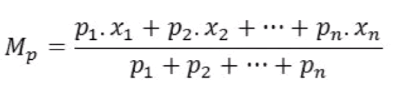

### Vamos ver na pratica.

In [8]:
# Criando dados
dados_ponderado = {'Bimestre':['1º','2º','3º','4º'],'Nota':[10,8,4,5],'Peso':[1,2,3,4]}
df_ponderado = pd.DataFrame(dados_ponderado)
df_ponderado = df_ponderado.set_index('Bimestre')
df_ponderado

,Nota,Peso
Bimestre,,
1º,10,1
2º,8,2
3º,4,3
4º,5,4


In [9]:
# Calculando
notas = df_ponderado['Nota']
peso = df_ponderado['Peso']

media_ponderada = (notas*peso).sum() / peso.sum()
print('No caso deste aluno que obteve media {},\n nao foi sulficiente para passar na materia de estatistica\n  que exigia nota superior a 6'.format(media_ponderada))

No caso deste aluno que obteve media 5.8,
 nao foi sulficiente para passar na materia de estatistica
  que exigia nota superior a 6


In [10]:
# Utilizando das bibliotecas
np.average(notas,weights=peso)

5.8

## Media Aritmetica, Moda e Mediana com dados agrupados.

Apesar dos conceitos serem os mesmos dos ja apresentados para Media Aritmetica, Moda e Mediana. Quando trabalhamos com dados agrupados, as formulas de calculo se alteram, uma vez que temos frequencias de dados aparecendo por classes de valores.

O objetivo agora e' apresentar o que fazer quando nos deparamos com isso.

In [11]:
# Ciando DataSet agrupado
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


Observe que agora no intervalo de 150 a 154 (nao incluso), temos 5 valores correspondentes, portanto, por nao saber qual valor e' qual, o que se deve fazer para fins de calculo e' multiplicar a frequencia pelo ponto medio da classe.

Outras colunas tambem sao adicionadas, e' o caso da coluna Multiplicacao da frequencia por Ponto medio e a coluna da Frequencia Acumulada

In [12]:
# Adicionar Xmedio
dataset['xi'] = (dataset['inferior'] + dataset['superior']) / 2

# Adicionar Multiplicacao da frequencia por Ponto medio
dataset['fi.xi'] = dataset['xi'] * dataset['fi']

# Adicionar Frequencia Acumulada
fi_acumulada = []
contador = 0
for linha in dataset.iterrows():
    contador += linha[1][2]
    fi_acumulada.append(contador)
dataset['Fi'] = fi_acumulada

dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


### Media Aritmetica Acumuada
Calculada pela formula:
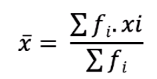

In [13]:
## Media
media_acumulada = dataset['fi.xi'].sum() / dataset['fi'].sum()
media_acumulada

160.7

### Moda Acumuada
Continua a ser o valor que mais aparece, neste caso:

In [14]:
## Moda
filtro = dataset[dataset['fi'] == dataset['fi'].max()]
moda_acumulada = filtro['xi'].values[0]
moda_acumulada

160.0

### Mediana Acumuada
Calculada pela formula:
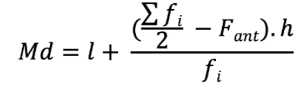
Onde:
>    l = Limite inferior da classe                  ///  fi = frequencia
///   F ant = Frequencia Anterior (acumulda)       ///  h = Amplitude dos elementos

In [15]:
## Mediana
posicao = dataset['fi'].sum() / 2
print('Posicao da Mediana = ',posicao)

Posicao da Mediana =  20.0


In [16]:
limite_inf, freq_classe, id_freq_anterior = 0,0,0
for linha in dataset.iterrows():
    limite_inf = linha[1][0]
    freq_classe = linha[1][2]
    id_freq_anterior = linha[0]
    if linha[1][5] > posicao:
        id_freq_anterior -= 1
        break
        
print('Limite inferior (l) = {}, Frequencia da classe (fi) = {}, e o ID da F ant = {}'.format(limite_inf, freq_classe, id_freq_anterior))

Limite inferior (l) = 158.0, Frequencia da classe (fi) = 11.0, e o ID da F ant = 1


In [17]:
F_anterior = dataset.iloc[[id_freq_anterior]]['Fi'].values[0]
print('Valor do F ant = ',F_anterior)

Valor do F ant =  14.0


In [18]:
## Aplicando a formula
mediana = limite_inf + ((posicao - F_anterior)* 4)/freq_classe
mediana

160.1818181818182

### Criando uma funcao que calcule media moda e mediana acumulada

In [19]:
## Funcao completa
def get_estatisticas(dataframe):
    media = dataset['fi.xi'].sum() / dataset['fi'].sum()
    moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

    fi_2 = dataset['fi'].sum() / 2
    limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
    for i, linha in enumerate(dataset.iterrows()):
        limite_inferior = linha[1][0]
        frequencia_classe = linha[1][2]
        id_frequencia_anterior = linha[0]
        if linha[1][5] >= fi_2:
            id_frequencia_anterior -= 1
            break
    Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
    mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

    return media, moda, mediana

In [20]:
get_estatisticas(dataset)

(160.7, 160.0, 160.1818181818182)

# Fim